In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
c = np.array([-40, -10, 0, 8, 15, 22, 38])
f = np.array([-40, 14, 32, 46, 59, 72, 100])

In [5]:
model = keras.Sequential()
model.add(Dense(units=1, input_shape=(1,), activation='linear'))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))
history = model.fit(c, f, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 541ms/step - loss: 6839.2178
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 6473.6060
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 6119.7217
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 5777.7524
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 5447.8735
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 5130.2310
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 4824.9497
Epoch 8/500
1/1 [==============================] - 0s 6ms/step - loss: 4532.1299
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 4251.8438
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 3984.1328
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 3729.0103
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 3486.4592
Epoch 13/500
1/1 [=====

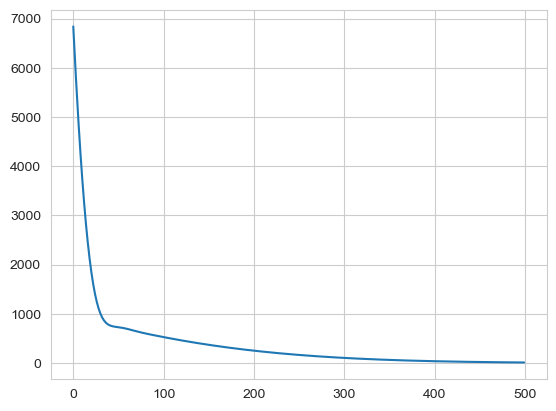

In [6]:
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [7]:
print(model.predict([100]))

1/1 [==============================] - 0s 102ms/step
[[211.2866]]


In [8]:
print(model.get_weights())

[array([[1.8275342]], dtype=float32), array([28.533186], dtype=float32)]


In [9]:
from tensorflow.keras.datasets import mnist

In [10]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
# X_train
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


In [26]:
# X_train = X_train / 255
# X_test = X_test / 255

In [27]:
# y_train_cat = keras.utils.to_categorical(y_train, 10)
# y_test_cat = keras.utils.to_categorical(y_test, 10)

In [28]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

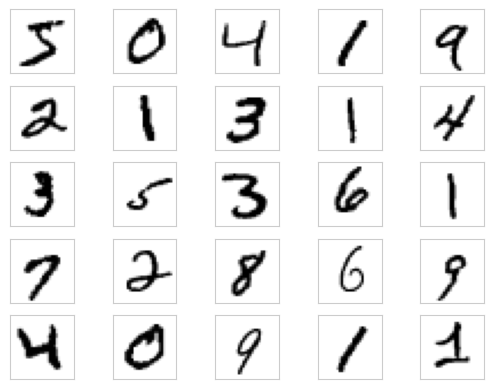

In [29]:
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [30]:
# model = keras.Sequential([Flatten(input_shape=(28,28)),
#                           Dense(128, activation='relu'),
#                           Dense(10, activation='softmax')])
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [31]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.2910 - accuracy: 0.9171 - val_loss: 0.1562 - val_accuracy: 0.9572
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1263 - accuracy: 0.9639 - val_loss: 0.1098 - val_accuracy: 0.9687
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0862 - accuracy: 0.9750 - val_loss: 0.0922 - val_accuracy: 0.9732
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9809 - val_loss: 0.0897 - val_accuracy: 0.9722
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0493 - accuracy: 0.9861 - val_loss: 0.0858 - val_accuracy: 0.9758


In [33]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.0783 - accuracy: 0.9764


[0.0783388689160347, 0.9764000177383423]

1/1 [==============================] - 0s 53ms/step
[[3.8348048e-07 1.1569659e-07 5.0775570e-06 5.5423687e-04 3.8151153e-12
  6.6945113e-08 6.0340786e-12 9.9943286e-01 1.7486692e-06 5.3519784e-06]]
Распознанная цифра: 7


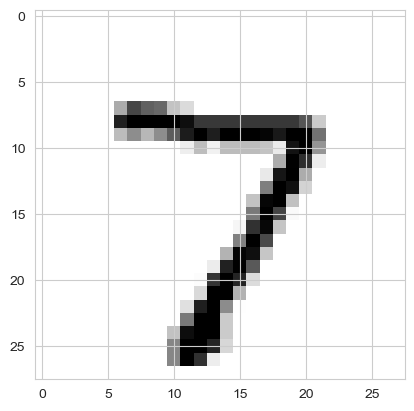

In [34]:
n = 0
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f'Распознанная цифра: {np.argmax(res)}')
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [37]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred.shape)

313/313 [==============================] - 0s 1ms/step
(10000,)


In [39]:
mask = pred == y_test
x_false = x_test[~mask]
p_false = pred[~mask]
print(x_false.shape)

(236, 28, 28)


Значение сети: 6


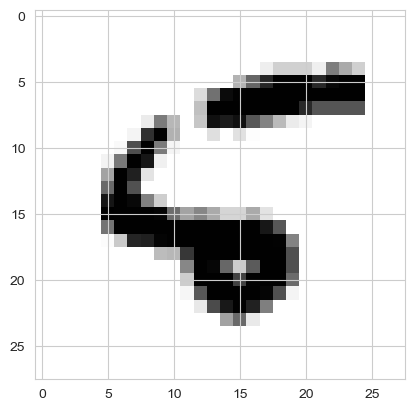

Значение сети: 6


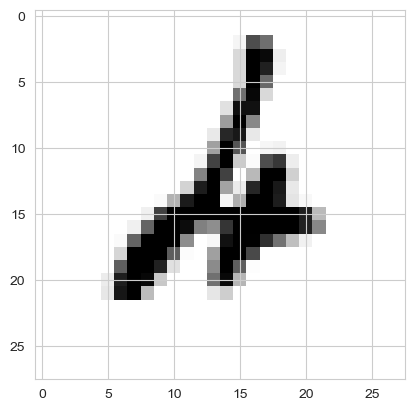

Значение сети: 7


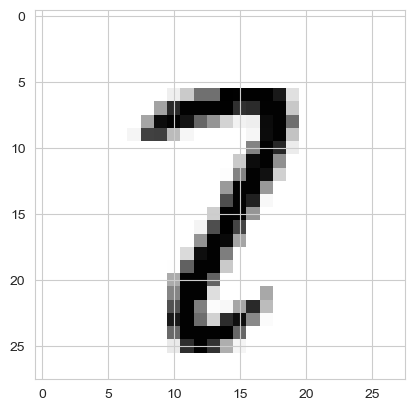

Значение сети: 3


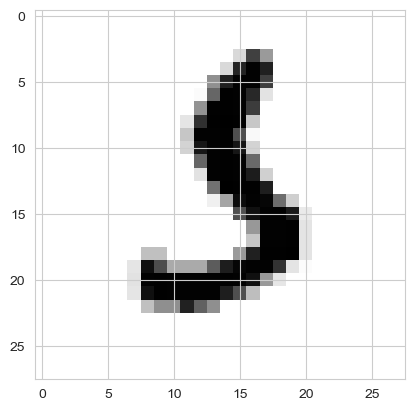

Значение сети: 0


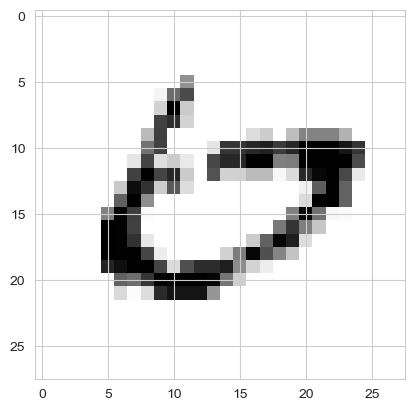

In [40]:
for i in range(5):
    print("Значение сети: " + str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()